In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
nlp = spacy.load("en_core_web_sm")
import gensim
import matplotlib.pyplot as plt
import plotly
import datetime
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob 
import re
from collections import Counter
# from allennlp.predictors.predictor import Predictor

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/trump-tweets/trumptweets.csv


In [2]:
tweets = pd.read_csv("../input/trump-tweets/trumptweets.csv")

In [3]:
tweets['year'] = tweets.date.apply(lambda x: int(x[0:4]))
tweets_filter = tweets[tweets['year'] >= 2016]

In [4]:
tweets_filter['formatted_date'] = pd.to_datetime(tweets_filter['date'])
tweets_filter['day_of_year'] = tweets_filter['formatted_date'].apply(lambda x: x.dayofyear)
tweets_filter['week_of_year'] = tweets_filter['formatted_date'].apply(lambda x: x.weekofyear)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [5]:
start_date = datetime.datetime(2016,1,1).date()
dates = []
counts = []
reweets = []
count = 0
for el in tweets_filter.formatted_date.dt.date:
    if (el-start_date).days <= 7:
#         print("entered here")
        count += 1
    else:
        counts.append(count)
        dates.append(start_date.strftime("%Y %b-%d"))
        start_date = (start_date+datetime.timedelta(days = 7))
        count = 1

In [6]:
fig = go.Figure(data=go.Scatter(x=dates, y=counts,line=dict(color='firebrick', width=4)))
fig.update_layout(title='No of Tweets by POTUS',
                   xaxis_title='No of Tweets',
                   yaxis_title='Week',
                  xaxis = go.layout.XAxis(
        tickangle = 270))
fig.update_xaxes(nticks=10)
fig.show()



There was a slight increase in no of tweets per week that peaked in the week of october 4th 2019

In [7]:
 def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
  
  

In [8]:
tweets_filter['content'] = tweets_filter.content.apply(clean_tweet)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet.lower()) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [10]:
%%time
tweets_filter['sentiment'] = tweets_filter.content.apply(get_tweet_sentiment)

CPU times: user 10.9 s, sys: 0 ns, total: 10.9 s
Wall time: 10.9 s


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
%%time
word_cloud_data = {}
NER_data = {}
for sentiment in tweets_filter.sentiment.unique():
    data_filter = tweets_filter[(tweets_filter.formatted_date.dt.date >= \
                                 datetime.datetime(2017,1,1).date())&\
                               (tweets_filter.sentiment == sentiment)]
    tweetText = data_filter.content.tolist()
    words = []
    NER = []
    for t in tweetText:
        doc = nlp(t)
        ner = []
        for ent in doc.ents:
            NER.append(ent.label_)
        for w in t.split():
            if w.strip().lower() not in STOPWORDS:
                words.append(w.strip().lower())
    word_cloud_data[sentiment] = words
    NER_data[sentiment] = NER

CPU times: user 2min 11s, sys: 147 ms, total: 2min 12s
Wall time: 2min 12s


Text(0, 0.5, 'Tweets')

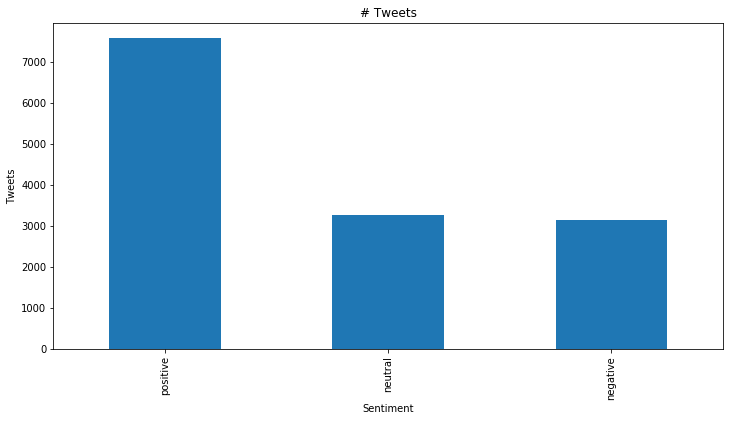

In [12]:
fig = plt.figure(figsize=(12,6))
tweets_filter.sentiment.value_counts().plot(kind = "bar", title = "# Tweets")
plt.xlabel('Sentiment')
plt.ylabel('Tweets')
# plt.title.set_text("No of tweets")

**The POTUS Tweets positively**

**A word cloud of tweets by the POTUS**

CPU times: user 8.67 s, sys: 414 ms, total: 9.09 s
Wall time: 8.95 s


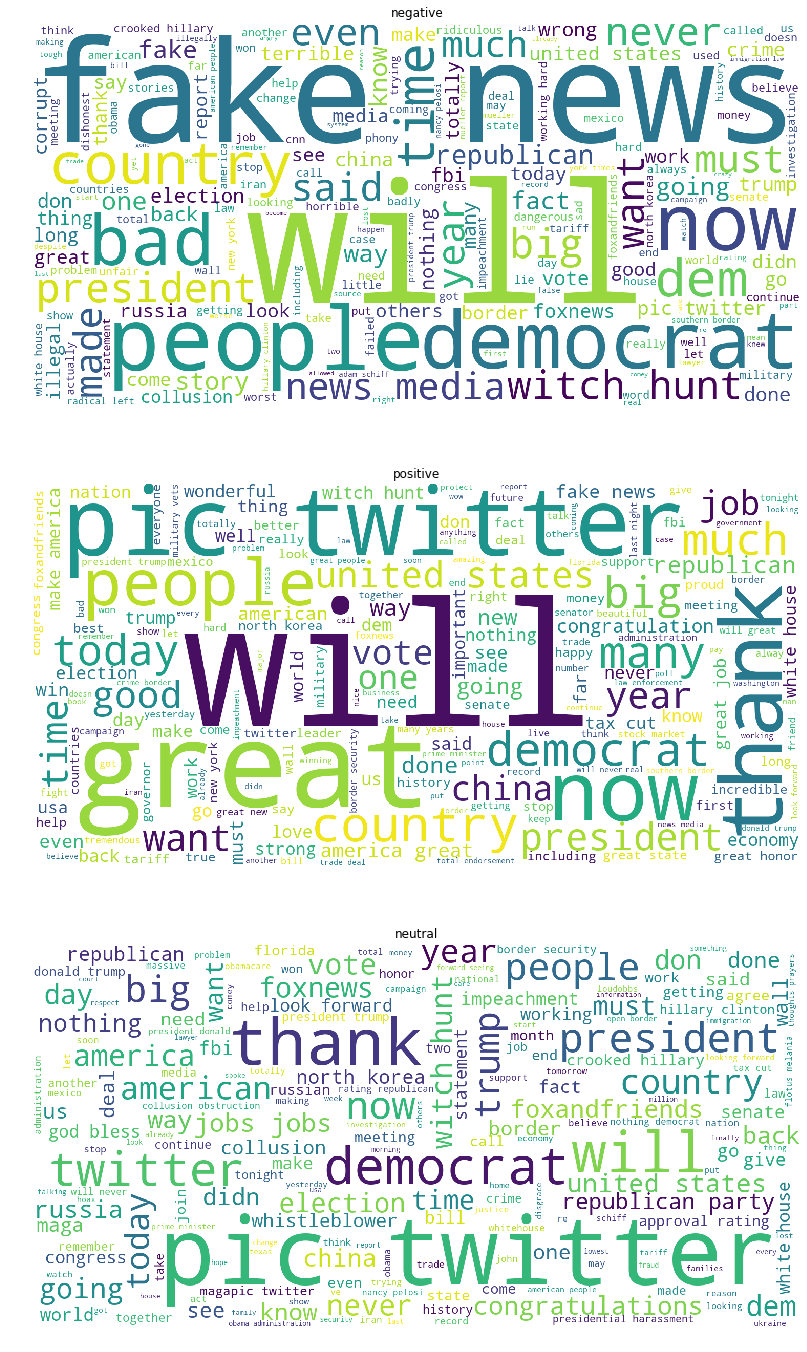

In [13]:
%%time
fig = plt.figure(figsize=(24,24))
axes = fig.subplots(nrows=3, ncols=1)
counter = 0
for row in axes:
    unique_string = (" ").join(list(word_cloud_data.values())[counter])
    wordcloud = WordCloud(width = 1500, height = 750, background_color = "white").generate(unique_string)
    row.title.set_text(list(word_cloud_data.keys())[counter])
    row.imshow(wordcloud)
    row.axis("off")
    counter+=1

**A breakdown of Entities the POTUS talks about in the tweets**

In [14]:
%%time
for sentiment in tweets_filter.sentiment.unique():
    counter = Counter(NER_data[sentiment])
    labels = list(counter.keys())
    values = list(counter.values())
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title = sentiment)
    fig.show()


CPU times: user 579 ms, sys: 4.02 ms, total: 583 ms
Wall time: 580 ms
